In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
data_b_PM25=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/PM2_5_Data.xlsx",sheet_name='Birmingham')
data_l_PM25=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/PM2_5_Data.xlsx",sheet_name='London')
data_lp_PM25=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/PM2_5_Data.xlsx",sheet_name='Liverpool')

In [3]:
df_b_PM25=data_b_PM25[["Year","Site_Name","City","Annual_Mean"]]
df_l_PM25=data_l_PM25[["Year","Site_Name","City","Annual_Mean"]]
df_lp_PM25=data_lp_PM25[["Year","Site_Name","City","Annual_Mean"]]

In [4]:
df_b_PM25=data_b_PM25.groupby('Year').agg(PM25_Birmingham=('Annual_Mean', 'mean')).reset_index()
df_l_PM25=data_l_PM25.groupby('Year').agg(PM25_London=('Annual_Mean', 'mean')).reset_index()
df_lp_PM25=data_lp_PM25.groupby('Year').agg(PM25_Liverpool=('Annual_Mean', 'mean')).reset_index()

In [5]:
B_PM25=df_b_PM25['PM25_Birmingham']
l_PM25=df_l_PM25['PM25_London']
lp_PM25=df_lp_PM25['PM25_Liverpool']

In [20]:
df_b_PM25

,Year,PM25_Birmingham
0,2000,15.000000
1,2001,14.000000
2,2002,15.000000
3,2003,14.000000
4,2004,15.000000
5,2005,16.000000
6,2006,15.000000
7,2007,14.000000
8,2008,15.000000
9,2009,14.000000


In [7]:
print("Maximum of Birmingham",max(B_PM25))
print("Maximum of London",max(l_PM25))
print("Maximum of Liverpool",max(lp_PM25))

Maximum of Birmingham 16.666666666666668
Maximum of London 20.0
Maximum of Liverpool 12.0


In [8]:
print("Minimum of Birmingham",min(B_PM25))
print("Minimum of London",min(l_PM25))
print("Minimum of Liverpool",min(lp_PM25))

Minimum of Birmingham 7.666666666666667
Minimum of London 8.4
Minimum of Liverpool 6.0


In [9]:
print("SD of Birmingham",B_PM25.std())
print("SD of London",l_PM25.std())
print("SD of Liverpool",lp_PM25.std())

SD of Birmingham 2.6475973314189694
SD of London 3.3100981010889647
SD of Liverpool 1.7804382815217998


In [10]:
print("Variance of Birmingham",B_PM25.var())
print("Variance of London",l_PM25.var())
print("Variance of Liverpool",lp_PM25.var())

Variance of Birmingham 7.009771629336847
Variance of London 10.95674943883277
Variance of Liverpool 3.1699604743083


In [11]:
print("Mean of Birmingham",B_PM25.mean())
print("Mean of London",l_PM25.mean())
print("Mean of Liverpool",lp_PM25.mean())

Mean of Birmingham 12.913043478260873
Mean of London 14.438888888888886
Mean of Liverpool 10.478260869565217


In [12]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_PM252, l_PM252, and lp_PM252 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_PM25,
    'London': l_PM25,
    'Liverpool': lp_PM25
})

# Perform one-way APM25VA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='PM25 Concentration')['PM25 Concentration'],
                                   data.melt(var_name='City', value_name='PM25 Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)
else:
    print("There is PM25 significant difference among the cities.")


F-statistic: 13.026948951880355
p-value: 1.704346284465871e-05
The means are significantly different among the cities.
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Birmingham Liverpool  -2.4348 0.0077 -4.3115 -0.5581   True
Birmingham    London   1.5258 0.1331 -0.3509  3.4026  False
 Liverpool    London   3.9606    0.0  2.0839  5.8374   True
-----------------------------------------------------------


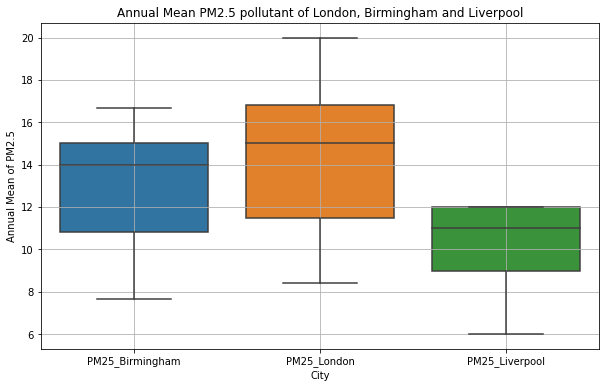

In [15]:
# Combine the data frames
merged_df = df_b_PM25.merge(df_l_PM25, on='Year').merge(df_lp_PM25, on='Year')

# Create a new data frame for Seaborn (melt the data to make it long-form)
melted_df = pd.melt(merged_df, id_vars='Year', var_name='City', value_name='PM2.5_Concentration')

# Plot box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='PM2.5_Concentration', data=melted_df)
plt.title('Annual Mean PM2.5 pollutant of London, Birmingham and Liverpool')
plt.ylabel('Annual Mean of PM2.5')
plt.xlabel('City')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_NO2, l_NO2, and lp_NO2 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_PM25,
    'London': l_PM25,
    'Liverpool': lp_PM25
})

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='NO Concentration')['NO Concentration'],
                                   data.melt(var_name='City', value_name='NO Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)

    # Get the increasing order of cities based on their NO2 concentrations
    mean_values = data.mean().sort_values(ascending=False)  # Sort in ascending order
    increasing_order = mean_values.index.tolist()
    print("Increasing order of cities based on PM 2.5 concentrations:")
    print(increasing_order)

else:
    print("There is no significant difference among the cities.")


F-statistic: 13.026948951880355
p-value: 1.704346284465871e-05
The means are significantly different among the cities.
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Birmingham Liverpool  -2.4348 0.0077 -4.3115 -0.5581   True
Birmingham    London   1.5258 0.1331 -0.3509  3.4026  False
 Liverpool    London   3.9606    0.0  2.0839  5.8374   True
-----------------------------------------------------------
Increasing order of cities based on PM 2.5 concentrations:
['London', 'Birmingham', 'Liverpool']
